In [1]:
import pycaret

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

import lightgbm 

from pycaret.classification import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmmi10',
 'STIXGeneral',
 'cmex10',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'cmb10',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'cmsy10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmtt10',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmr10',
 'STIXNonUnicode',
 'cmss10',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'FZYaoTi',
 'Imprint MT Shadow',
 'Trebuchet MS',
 'SimSun',
 'Microsoft Himalaya',
 'Comic Sans MS',
 'Book Antiqua',
 'Gill Sans MT Ext Condensed Bold',
 'Bodoni MT',
 'Nirmala UI',
 'NanumGothic',
 'Gill Sans MT',
 'Century Gothic',
 'Sitka Small',
 'Corbel',
 'DengXian',
 'Perpetua',
 'SimSun-ExtB',
 'Constantia',
 'Calibri',
 'Wingdin

In [4]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

In [5]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.rc("font", family = "NanumGothic")
sns.set(font="NanumGothic", 
rc={"axes.unicode_minus":False}, style='white')

# 데이터 불러오기 및 col 한글화

In [7]:
train_df = pd.read_csv('C:/Users/rnfrn/Downloads/open/train.csv')

In [8]:
train_df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [9]:
test_df = pd.read_csv('C:/Users/rnfrn/Downloads/open/test.csv')

In [10]:
for i in test_df.columns:
  print(i)


id
base_date
day_of_week
base_hour
lane_count
road_rating
road_name
multi_linked
connect_code
maximum_speed_limit
vehicle_restricted
weight_restricted
height_restricted
road_type
start_node_name
start_latitude
start_longitude
start_turn_restricted
end_node_name
end_latitude
end_longitude
end_turn_restricted


In [11]:
for i in train_df.columns:
  print(i)


id
base_date
day_of_week
base_hour
lane_count
road_rating
road_name
multi_linked
connect_code
maximum_speed_limit
vehicle_restricted
weight_restricted
height_restricted
road_type
start_node_name
start_latitude
start_longitude
start_turn_restricted
end_node_name
end_latitude
end_longitude
end_turn_restricted
target


In [12]:
train_info_df = pd.read_csv('C:/Users/rnfrn/Downloads/open/data_info.csv')

In [13]:
train_info_df = train_info_df.drop([4], axis = 0)

In [14]:
train_info_df

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한
10,weight_restricted,통과제한하중


In [15]:
for i in train_info_df['변수 설명'].iloc[0:23]:
  print(i)

아이디
날짜
요일
시간대
차로수
도로등급
중용구간 여부
연결로 코드
최고속도제한
통과제한하중
통과제한높이
도로유형
시작지점의 위도
시작지점의 경도
시작 지점의 회전제한 유무
도착지점의 위도
도착지점의 경도
도작지점의 회전제한 유무
도로명
시작지점명
도착지점명
통과제한차량
평균속도(km)


In [16]:
for i,j in zip(test_df.columns, train_info_df['변수 설명'].iloc[0:22]):
  test_df.rename(columns={i : j},inplace=True)

In [17]:
for i in test_df.columns:
  print(i)

아이디
날짜
요일
시간대
차로수
도로등급
중용구간 여부
연결로 코드
최고속도제한
통과제한하중
통과제한높이
도로유형
시작지점의 위도
시작지점의 경도
시작 지점의 회전제한 유무
도착지점의 위도
도착지점의 경도
도작지점의 회전제한 유무
도로명
시작지점명
도착지점명
통과제한차량


In [18]:
for i,j in zip(train_df.columns, train_info_df['변수 설명'].iloc[0:24]):
  train_df.rename(columns={i : j},inplace=True)

In [19]:
train_df['평균속도(km)']

0          52.0
1          30.0
2          61.0
3          20.0
4          38.0
           ... 
4701212    20.0
4701213    65.0
4701214    30.0
4701215    73.0
4701216    35.0
Name: 평균속도(km), Length: 4701217, dtype: float64

In [20]:
train_df

,아이디,날짜,요일,시간대,차로수,도로등급,중용구간 여부,연결로 코드,최고속도제한,통과제한하중,통과제한높이,도로유형,시작지점의 위도,시작지점의 경도,시작 지점의 회전제한 유무,도착지점의 위도,도착지점의 경도,도작지점의 회전제한 유무,도로명,시작지점명,도착지점명,통과제한차량,평균속도(km)
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [21]:
for i in train_df.columns:
  print(i)

아이디
날짜
요일
시간대
차로수
도로등급
중용구간 여부
연결로 코드
최고속도제한
통과제한하중
통과제한높이
도로유형
시작지점의 위도
시작지점의 경도
시작 지점의 회전제한 유무
도착지점의 위도
도착지점의 경도
도작지점의 회전제한 유무
도로명
시작지점명
도착지점명
통과제한차량
평균속도(km)


# EDA

## 수치형 데이터 탐색하기

In [22]:
print(train_df.select_dtypes(exclude=['object']).columns)

Index(['날짜', '시간대', '차로수', '도로등급', '연결로 코드', '최고속도제한', '통과제한하중', '통과제한높이',
       '도로유형', '시작지점의 위도', '시작지점의 경도', '도착지점의 위도', '도착지점의 경도', '시작지점명',
       '도착지점명', '평균속도(km)'],
      dtype='object')


In [23]:
print("훈련 데이터에서 수치형 데이터의 갯수:", len(train_df.select_dtypes(exclude=['object']).columns))

훈련 데이터에서 수치형 데이터의 갯수: 16


In [24]:
train_df_non_object = train_df.select_dtypes(exclude=['object'])

In [25]:
train_df_non_object

,날짜,시간대,차로수,도로등급,연결로 코드,최고속도제한,통과제한하중,통과제한높이,도로유형,시작지점의 위도,시작지점의 경도,도착지점의 위도,도착지점의 경도,시작지점명,도착지점명,평균속도(km)
0,20220623,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,33.427749,126.662335,52.0
1,20220728,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0
2,20211010,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0
3,20220311,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0
4,20211005,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,20211104,16,1,107,0,0,50.0,0.0,0.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0
4701213,20220331,2,2,107,0,0,80.0,0.0,43200.0,0.0,3,33.472505,126.424368,33.472525,126.424890,65.0
4701214,20220613,22,2,103,0,0,60.0,0.0,0.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0
4701215,20211020,2,2,103,0,0,80.0,0.0,0.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0


## 범주형 데이터 탐색하기

In [26]:
print(train_df.select_dtypes(include=['object']).columns)

Index(['아이디', '요일', '중용구간 여부', '시작 지점의 회전제한 유무', '도작지점의 회전제한 유무', '도로명',
       '통과제한차량'],
      dtype='object')


In [27]:
train_df_object = train_df.select_dtypes(include=['object'])

In [28]:
train_df_object

,아이디,요일,중용구간 여부,시작 지점의 회전제한 유무,도작지점의 회전제한 유무,도로명,통과제한차량
0,TRAIN_0000000,목,지방도1112호선,제3교래교,없음,제3교래교,없음
1,TRAIN_0000001,목,일반국도11호선,광양사거리,있음,KAL사거리,없음
2,TRAIN_0000002,일,일반국도16호선,창고천교,없음,상창육교,없음
3,TRAIN_0000003,금,태평로,남양리조트,없음,서현주택,없음
4,TRAIN_0000004,화,일반국도12호선,애월샷시,없음,애월입구,없음
...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,목,-,대림사거리,없음,금덕해운,없음
4701213,TRAIN_4701213,목,-,광삼교,없음,광삼교,없음
4701214,TRAIN_4701214,월,일반국도12호선,고성교차로,없음,성산교차로,없음
4701215,TRAIN_4701215,수,일반국도95호선,제6광령교,없음,관광대학입구,없음


## 상관관계 분석

In [29]:
train_corr_df=train_df.corr()

In [30]:
train_df.corr()

,날짜,시간대,차로수,도로등급,연결로 코드,최고속도제한,통과제한하중,통과제한높이,도로유형,시작지점의 위도,시작지점의 경도,도착지점의 위도,도착지점의 경도,시작지점명,도착지점명,평균속도(km)
날짜,1.000000,-0.008645,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
시간대,-0.008645,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
차로수,0.011463,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
도로등급,0.018547,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
연결로 코드,0.000832,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
최고속도제한,-0.010633,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
통과제한하중,-0.018713,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
통과제한높이,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
도로유형,-0.011030,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
시작지점의 위도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
import matplotlib as mat

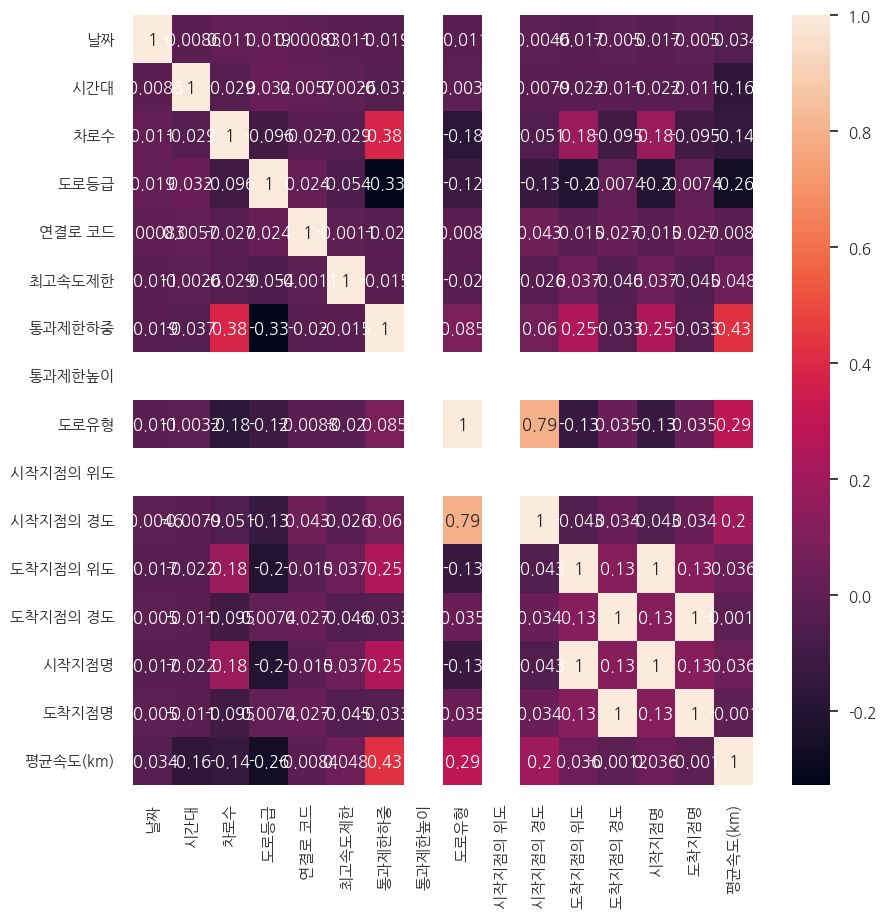

In [32]:
#상관분석하기
#각 변수가 어떤 상관 관계가 있는지. 수치가 높을수록 관계가 있다는 것이다.
fig = plt.figure(figsize = (10,10))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

In [33]:
list_A = ['연결로 코드','최고속도제한','시작지점의 위도','통과제한높이']
for i in list_A:
  train_df.drop(columns = [i], inplace = True)
  test_df.drop(columns = [i], inplace = True)

## 변수 분석- 각 변수간의 상관 관계 구하기

### 필요한 함수 먼저 정의하기

In [34]:
def identify_hist(df, col):

  print(df[col].unique())

  sns.histplot(data=df[col], kde=True)

In [35]:
def identify_count(df, col):

  print(df[col].unique())

  print(df[col].value_counts())

  sns.countplot(data=df, x=col)
  plt.show()

In [36]:
def identify_count_nongraph(df, col):

  print(df[col].value_counts())

In [37]:
def two_value_compare(df,col_1,col_2):
    sns.countplot(data=df, x = col_1, hue = col_2)

In [38]:
test_df.columns

Index(['아이디', '날짜', '요일', '시간대', '차로수', '도로등급', '중용구간 여부', '통과제한하중', '도로유형',
       '시작지점의 경도', '시작 지점의 회전제한 유무', '도착지점의 위도', '도착지점의 경도', '도작지점의 회전제한 유무',
       '도로명', '시작지점명', '도착지점명', '통과제한차량'],
      dtype='object')

### 도로 유형-시작지점의 경도

[32400.     0. 43200. 50000.]
0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: 도로유형, dtype: int64


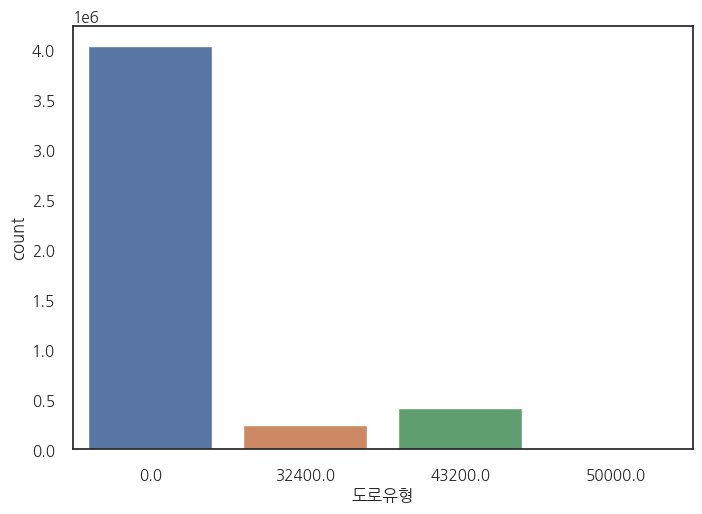

In [39]:
identify_count(train_df, '도로유형')

[3 0]
0    3737117
3     964100
Name: 시작지점의 경도, dtype: int64


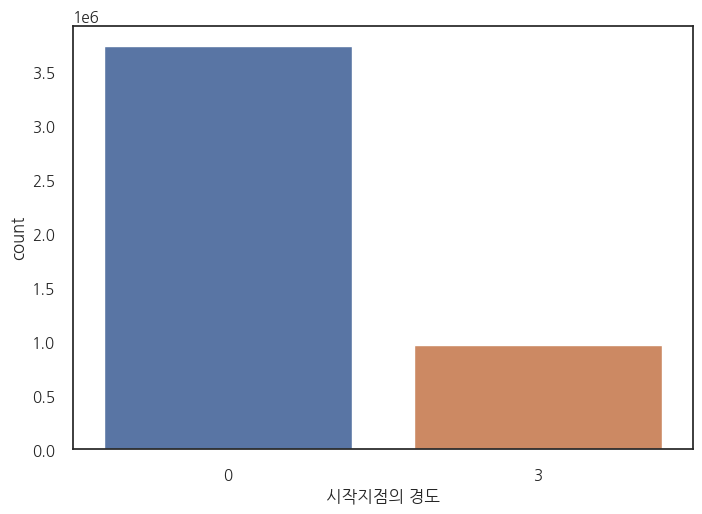

In [40]:
identify_count(train_df, '시작지점의 경도')

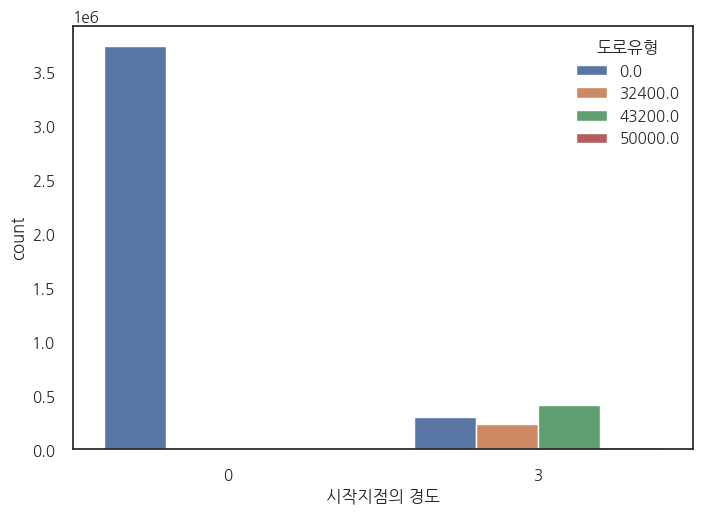

In [41]:
two_value_compare(train_df,'시작지점의 경도', '도로유형')

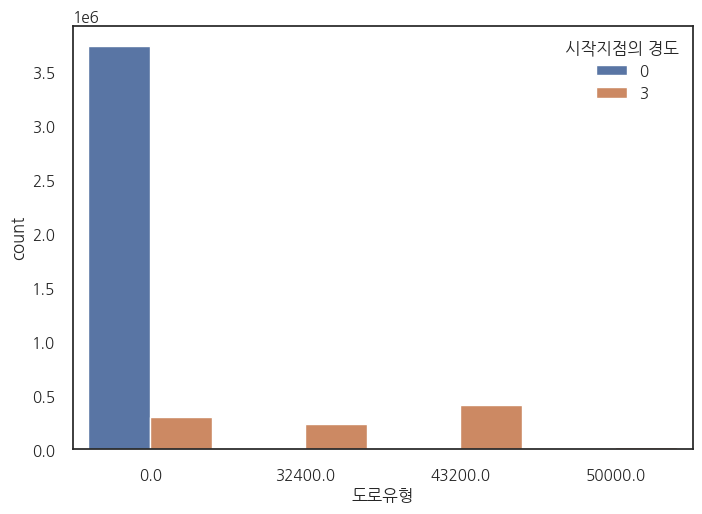

In [42]:
two_value_compare(train_df,'도로유형', '시작지점의 경도')

시작지점의 경도가 0일때 도로유형 0의 비중이 압도적으로 높다.

시작지점의 경도가 3일때 나머지 도로 유형들이 속한다.

도로유형 500000의 비중은 매우 낮다.

In [43]:
# 도로유형이 0과 나머지 숫자로 거의 이루어 지기 때문에 이걸로 파생변수를 만들어 보자.

train_df['도로유형 파생변수'] = train_df['도로유형'] == 0
test_df['도로유형 파생변수'] = test_df['도로유형'] == 0

In [44]:
train_df

,아이디,날짜,요일,시간대,차로수,도로등급,중용구간 여부,통과제한하중,도로유형,시작지점의 경도,시작 지점의 회전제한 유무,도착지점의 위도,도착지점의 경도,도작지점의 회전제한 유무,도로명,시작지점명,도착지점명,통과제한차량,평균속도(km),도로유형 파생변수
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,False
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,True
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,True
3,TRAIN_0000003,20220311,금,13,2,107,태평로,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,True
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,True
4701213,TRAIN_4701213,20220331,목,2,2,107,-,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,False
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,True
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,True


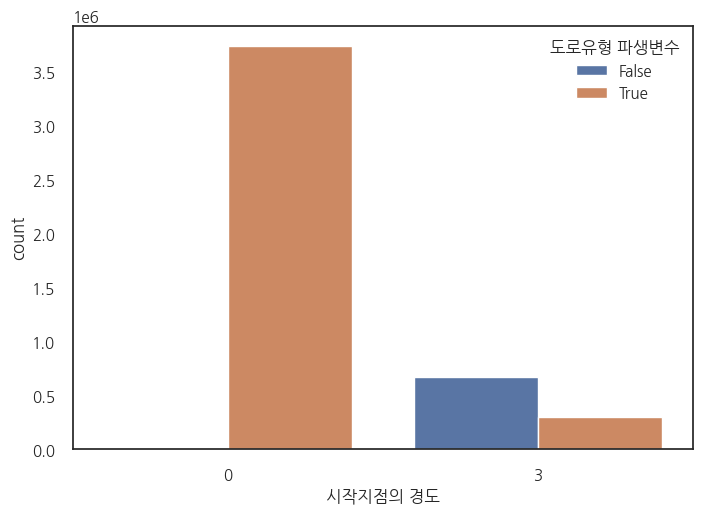

In [45]:
two_value_compare(train_df,'시작지점의 경도', '도로유형 파생변수')

### <차로수-도착지점의 위도>

[1 2 3]
2    2352092
1    1558531
3     790594
Name: 차로수, dtype: int64


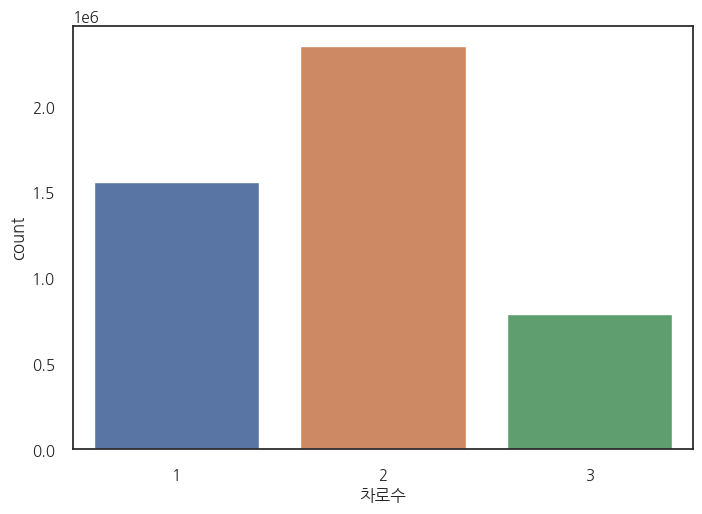

In [46]:
identify_count(train_df, '차로수')

이거 도착지점의 위도가 어마어마 하기 때문에 이걸 bin으로 묶어서 분석할 예정이다.

In [47]:
train_df['도착지점의 위도'].unique()

array([33.42774727, 33.50073043, 33.2791451 , 33.24608087, 33.46221435,
       33.2499487 , 33.41841197, 33.48239171, 33.25307382, 33.36171667,
       33.4194234 , 33.24850523, 33.48570693, 33.26411158, 33.31691324,
       33.47800071, 33.4858849 , 33.45242292, 33.46222797, 33.46531818,
       33.50010333, 33.27816804, 33.51846796, 33.25194718, 33.29173073,
       33.25060425, 33.48194055, 33.33082208, 33.48005319, 33.47227649,
       33.33724364, 33.43917961, 33.51439002, 33.33739788, 33.2455654 ,
       33.39397204, 33.48570433, 33.49007787, 33.4710608 , 33.40941553,
       33.45358486, 33.24487138, 33.46492456, 33.45173081, 33.52029216,
       33.40618113, 33.2996578 , 33.41294463, 33.40254552, 33.48366058,
       33.51972627, 33.26506545, 33.24699594, 33.38173029, 33.29174712,
       33.47505427, 33.47349412, 33.43379415, 33.25218326, 33.24760701,
       33.51157865, 33.25678487, 33.25462828, 33.40891283, 33.4852643 ,
       33.41947947, 33.3115379 , 33.28563828, 33.38975487, 33.41

In [48]:
labels = [1,2,3,4,5]

<AxesSubplot:>

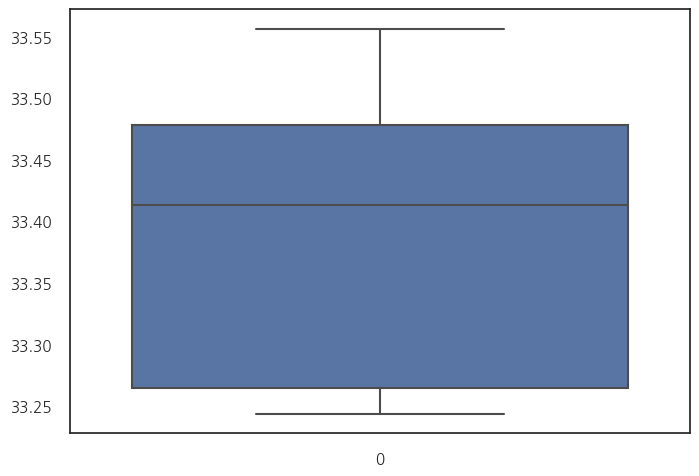

In [49]:
sns.boxplot(train_df['도착지점의 위도'])

In [50]:
train_df['도착지점의 위도 bin 5'] = pd.cut(train_df['도착지점의 위도'],5,labels=labels)
test_df['도착지점의 위도 bin 5'] = pd.cut(test_df['도착지점의 위도'],5,labels=labels)

[3, 5, 1, 4, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
1    1625703
4    1283992
5     779933
3     625642
2     385947
Name: 도착지점의 위도 bin 5, dtype: int64


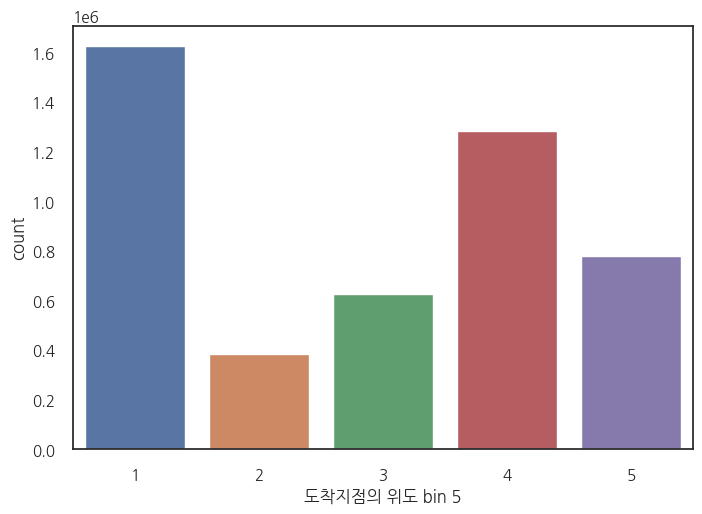

In [51]:
identify_count(train_df, '도착지점의 위도 bin 5')

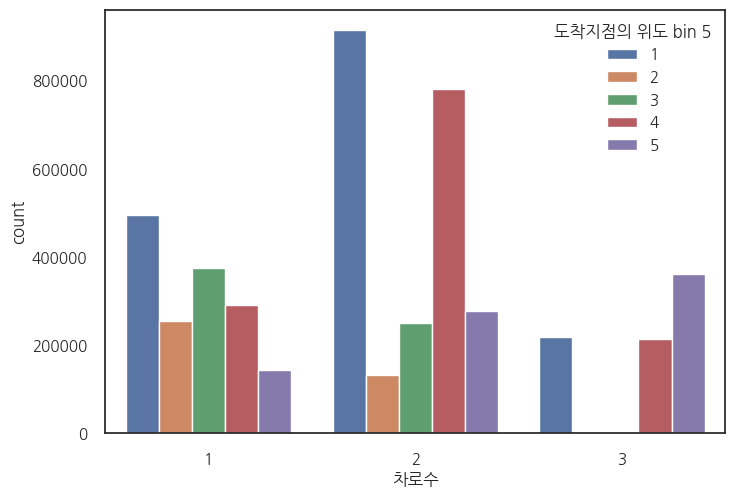

In [52]:
two_value_compare(train_df,'차로수', '도착지점의 위도 bin 5')

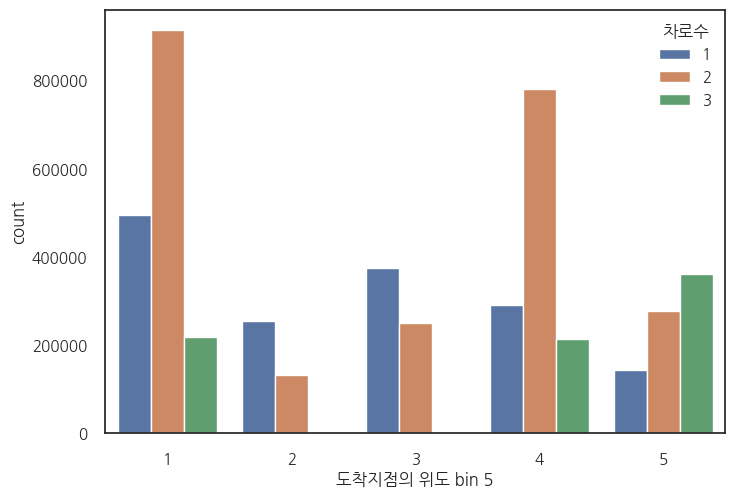

In [53]:
two_value_compare(train_df,'도착지점의 위도 bin 5', '차로수')

### <평균속도-통과제한하중> -- 0.34

[ 52.  30.  61.  20.  38.  28.  39.  14.  47.  40.  60.  58.  32.  35.
  50.  56.  46.  21.  70.  37.  33.  54.  31.  49.  59.  75.  36.  26.
  24.  10.  22.  53.  45.  77.  57.  48.  66.  41.  51.  44.  23.  73.
  18.  29.  62.  43.  55.  74.  25.  19.  78.  65.  17.  64.  27.  42.
  72.  71.  13.  16.  34.  15.  67.  85.   9.  81.  11.  82.  63.   7.
  76.  69.  80.  68.  12.  84.  88.  79.  87.   6.  83.   8.   5.  86.
   3.   4.   2.   1.  96. 112.  93.  94.  92.  91.  90.  99.  89.  97.
  95. 113.  98. 103.]
48.0     112044
49.0     110244
50.0     108822
54.0     108040
51.0     107347
53.0     106855
47.0     106664
52.0     106086
55.0     104761
33.0     102607
46.0     101467
32.0      99602
31.0      98001
45.0      97813
30.0      95679
34.0      95121
44.0      94645
36.0      94564
43.0      93725
38.0      93128
29.0      92749
35.0      92691
41.0      92545
42.0      92356
56.0      92319
39.0      92286
40.0      92245
37.0      91018
28.0      87514
57.0      85895
2

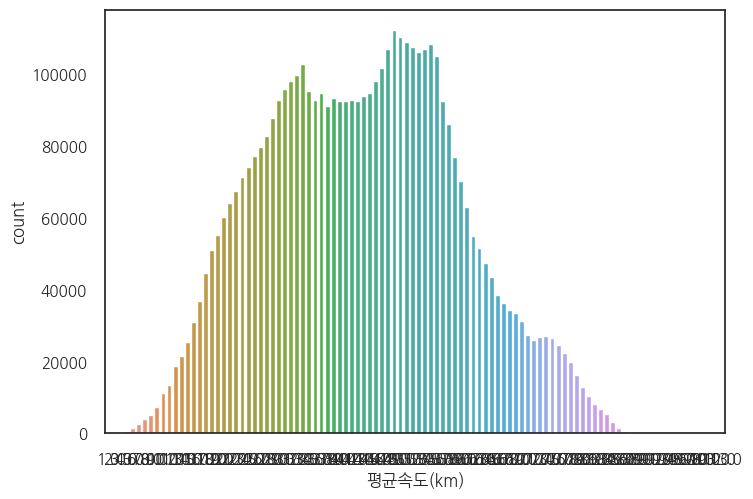

In [54]:
identify_count(train_df, '평균속도(km)')

결측치 발견----> 최댓값으로 대체

<AxesSubplot:>

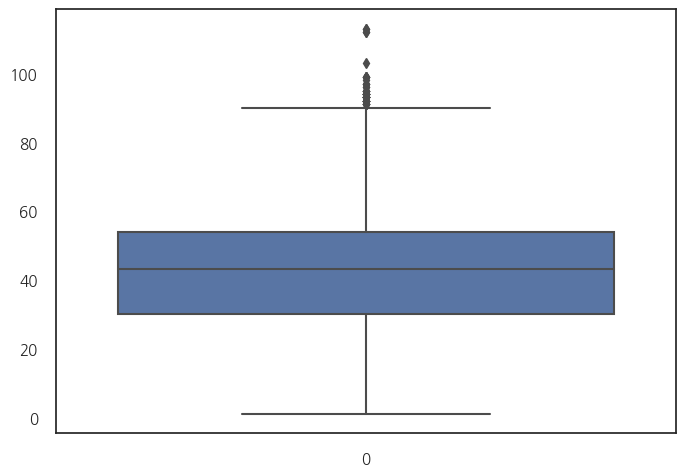

In [55]:
sns.boxplot(train_df['평균속도(km)'])

In [56]:
q1=train_df['평균속도(km)'].quantile(0.25)
q2=train_df['평균속도(km)'].quantile(0.5)
q3=train_df['평균속도(km)'].quantile(0.75)
iqr=q3-q1

In [57]:
condition=train_df['평균속도(km)']>q3+1.5*iqr
train_df[condition]

,아이디,날짜,요일,시간대,차로수,도로등급,중용구간 여부,통과제한하중,도로유형,시작지점의 경도,시작 지점의 회전제한 유무,도착지점의 위도,도착지점의 경도,도작지점의 회전제한 유무,도로명,시작지점명,도착지점명,통과제한차량,평균속도(km),도로유형 파생변수,도착지점의 위도 bin 5
236607,TRAIN_0236607,20220713,수,1,1,103,일반국도12호선,50.0,0.0,0,화순삼거리,33.254612,126.342103,없음,남당동,33.257983,126.352935,없음,96.0,True,1
242903,TRAIN_0242903,20211231,금,2,1,103,일반국도12호선,50.0,0.0,0,화순삼거리,33.254612,126.342103,없음,남당동,33.257983,126.352935,없음,112.0,True,1
245660,TRAIN_0245660,20211004,월,1,2,107,-,50.0,0.0,0,금성동교차로,33.287997,126.739326,없음,뒷못동교차로,33.289003,126.744291,없음,93.0,True,1
292163,TRAIN_0292163,20220729,금,2,1,106,지방도1118호선,50.0,0.0,0,제4교래교,33.430742,126.674333,없음,제주삼다수,33.424343,126.675832,없음,94.0,True,3
532891,TRAIN_0532891,20220727,수,1,1,106,지방도1118호선,50.0,0.0,0,제4교래교,33.430742,126.674333,없음,제주삼다수,33.424343,126.675832,없음,92.0,True,3
540989,TRAIN_0540989,20211004,월,2,1,107,-,50.0,0.0,0,진은교차로,33.284189,126.723306,없음,농협하나로마트,33.283593,126.720591,없음,94.0,True,1
568840,TRAIN_0568840,20211004,월,2,2,107,-,80.0,43200.0,3,하나로교,33.284552,126.724958,없음,하나로교,33.284439,126.724447,없음,94.0,False,1
786997,TRAIN_0786997,20220705,화,3,1,106,지방도1118호선,60.0,0.0,0,제주삼다수,33.424343,126.675832,없음,육성목장,33.421793,126.676661,없음,92.0,True,3
818357,TRAIN_0818357,20211003,일,1,1,103,일반국도11호선,60.0,43200.0,3,성판교,33.392035,126.616635,없음,성판교,33.392280,126.616521,없음,93.0,False,3
835012,TRAIN_0835012,20220726,화,3,2,103,일반국도12호선,70.0,0.0,0,덕수사거리,33.250611,126.303780,없음,한전아파트,33.250640,126.308215,없음,91.0,True,1


In [58]:
len(train_df[condition])

59

In [59]:
a=train_df[condition].index
train_df.drop(a,inplace=True)

In [60]:
train_df['평균속도(km)'].fillna(48.0)

0          52.0
1          30.0
2          61.0
3          20.0
4          38.0
           ... 
4701212    20.0
4701213    65.0
4701214    30.0
4701215    73.0
4701216    35.0
Name: 평균속도(km), Length: 4701158, dtype: float64

<AxesSubplot:>

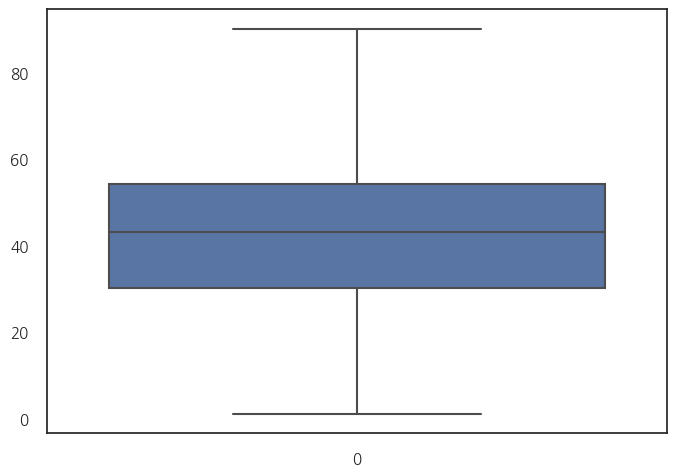

In [61]:
sns.boxplot(train_df['평균속도(km)'])

In [62]:
labels = [1,2,3,4,5,6,7,8,9,10]

In [63]:
train_df['평균속도 묶음'] = pd.cut(train_df['평균속도(km)'],10,labels=labels)

[52. 30. 61. 20. 38. 28. 39. 14. 47. 40. 60. 58. 32. 35. 50. 56. 46. 21.
 70. 37. 33. 54. 31. 49. 59. 75. 36. 26. 24. 10. 22. 53. 45. 77. 57. 48.
 66. 41. 51. 44. 23. 73. 18. 29. 62. 43. 55. 74. 25. 19. 78. 65. 17. 64.
 27. 42. 72. 71. 13. 16. 34. 15. 67. 85.  9. 81. 11. 82. 63.  7. 76. 69.
 80. 68. 12. 84. 88. 79. 87.  6. 83.  8.  5. 86.  3.  4.  2.  1. 90. 89.]
48.0    112044
49.0    110244
50.0    108822
54.0    108040
51.0    107347
53.0    106855
47.0    106664
52.0    106086
55.0    104761
33.0    102607
46.0    101467
32.0     99602
31.0     98001
45.0     97813
30.0     95679
34.0     95121
44.0     94645
36.0     94564
43.0     93725
38.0     93128
29.0     92749
35.0     92691
41.0     92545
42.0     92356
56.0     92319
39.0     92286
40.0     92245
37.0     91018
28.0     87514
57.0     85895
27.0     82594
26.0     79442
25.0     76958
58.0     76886
24.0     74098
23.0     71171
59.0     70012
22.0     67297
21.0     64083
60.0     62801
20.0     59976
19.0     55225
61.0

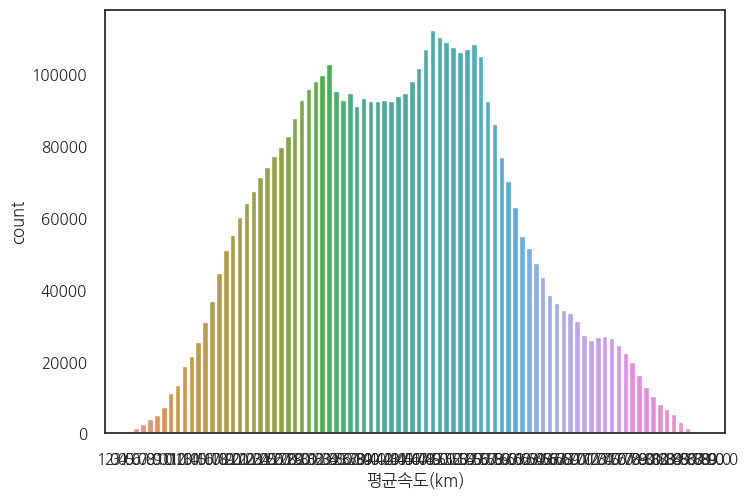

In [64]:
identify_count(train_df, '평균속도(km)')

In [65]:
train_df['평균속도(km)']

0          52.0
1          30.0
2          61.0
3          20.0
4          38.0
           ... 
4701212    20.0
4701213    65.0
4701214    30.0
4701215    73.0
4701216    35.0
Name: 평균속도(km), Length: 4701158, dtype: float64

[60. 80. 50. 70. 30. 40.]
60.0    1665557
50.0    1103656
70.0     995067
80.0     700327
30.0     229761
40.0       6790
Name: 통과제한하중, dtype: int64


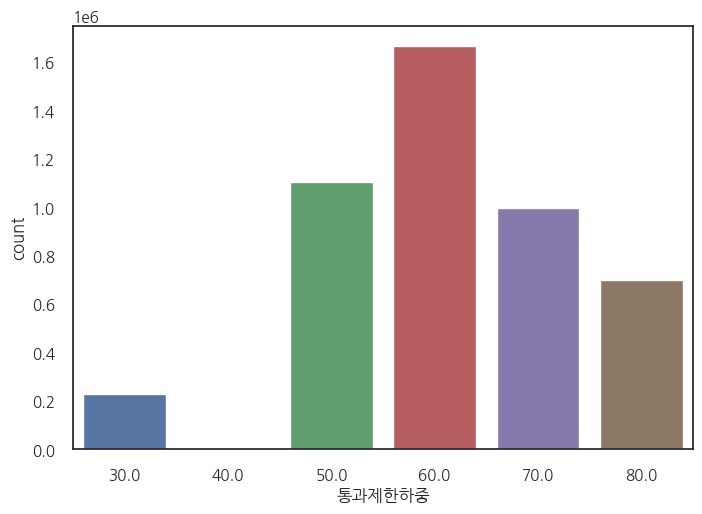

In [66]:
identify_count(train_df, '통과제한하중')

<AxesSubplot:>

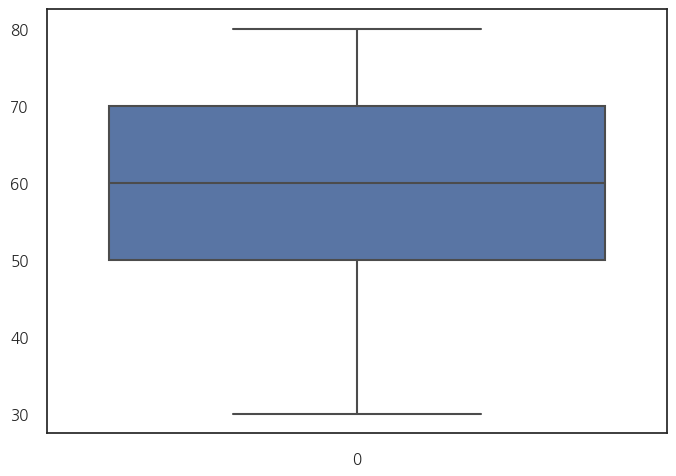

In [67]:
sns.boxplot(train_df['통과제한하중'])

In [68]:
list_A = [30,40,50,60,70,80]


In [69]:
train_df['도로유형 파생변수'] = train_df['도로유형'] == 0

In [70]:
for i in list_A:
    train_df['통과제한하중{}'.format(i)] = train_df['통과제한하중'] == i 

In [71]:
for i in list_A:
    test_df['통과제한하중{}'.format(i)] = train_df['통과제한하중'] == i 

[6, 4, 7, 3, 5, 2, 8, 9, 10, 1]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
6     967569
4     858528
5     839761
7     646280
3     630844
8     297086
2     253210
9     168167
1      21630
10     18083
Name: 평균속도 묶음, dtype: int64


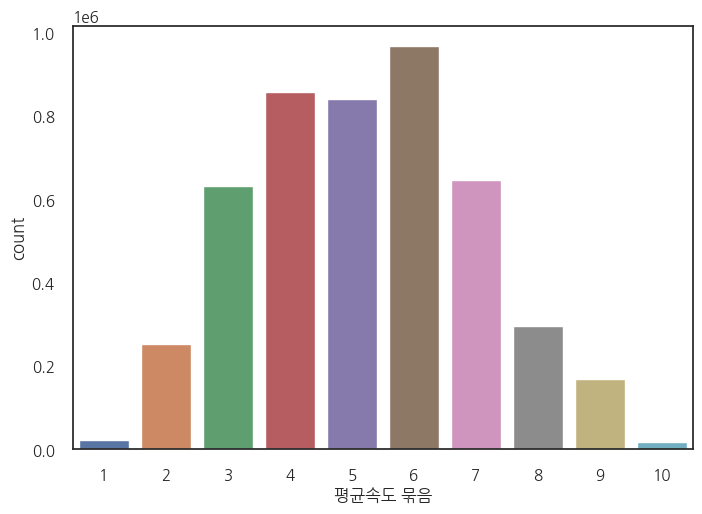

In [72]:
identify_count(train_df, '평균속도 묶음')

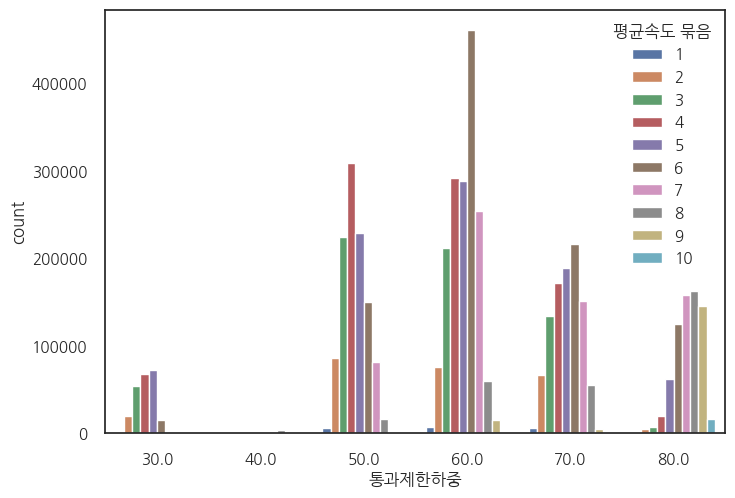

In [73]:
two_value_compare(train_df,'통과제한하중', '평균속도 묶음')

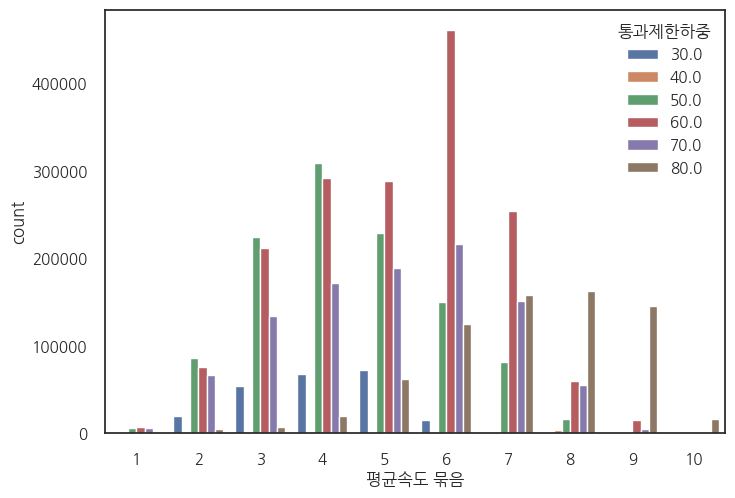

In [74]:
two_value_compare(train_df,'평균속도 묶음', '통과제한하중')

통과제한 하중에서 60이 해당하는 비중은 매우 크다.

평균속도 역시 60이 가장 많다.

따라서 평균속도에서 60의 비중이 가장 크다.

통과제한하중의 40의 비중은 거의 없다.

통과제한하중 60일때 평균속도 60이 가장 많다.


In [75]:
train_df

,아이디,날짜,요일,시간대,차로수,도로등급,중용구간 여부,통과제한하중,도로유형,시작지점의 경도,시작 지점의 회전제한 유무,도착지점의 위도,도착지점의 경도,도작지점의 회전제한 유무,도로명,시작지점명,도착지점명,통과제한차량,평균속도(km),도로유형 파생변수,도착지점의 위도 bin 5,평균속도 묶음,통과제한하중30,통과제한하중40,통과제한하중50,통과제한하중60,통과제한하중70,통과제한하중80
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,False,3,6,False,False,False,True,False,False
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,True,5,4,False,False,False,True,False,False
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,True,1,7,False,False,False,False,False,True
3,TRAIN_0000003,20220311,금,13,2,107,태평로,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,True,1,3,False,False,True,False,False,False
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,True,4,5,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,True,3,3,False,False,True,False,False,False
4701213,TRAIN_4701213,20220331,목,2,2,107,-,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,False,4,8,False,False,False,False,False,True
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,True,4,4,False,False,False,True,False,False
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,True,4,9,False,False,False,False,False,True


### 도착지점 역시 bin으로 묶어서 보자.

In [76]:
train_df['도착지점의 경도'].unique()

array([126.66261204, 126.52910676, 126.36859766, 126.56720431,
       126.32655111, 126.50566369, 126.26802903, 126.44162173,
       126.50639274, 126.76695786, 126.49149479, 126.5697971 ,
       126.60416217, 126.55404329, 126.62463436, 126.54384285,
       126.48997864, 126.38262408, 126.42363914, 126.90861217,
       126.5128511 , 126.66765084, 126.64568454, 126.5108937 ,
       126.50439627, 126.48925925, 126.44491529, 126.35417889,
       126.62548581, 126.41844275, 126.6958095 , 126.32938625,
       126.55591329, 126.69611703, 126.56622824, 126.26305981,
       126.49645148, 126.48655798, 126.54546676, 126.2591391 ,
       126.35308836, 126.56440729, 126.46434885, 126.36607703,
       126.5726991 , 126.61985724, 126.34616883, 126.39651071,
       126.86424417, 126.40509602, 126.57148823, 126.37206448,
       126.52435787, 126.79231223, 126.50500965, 126.52706682,
       126.54564685, 126.42043465, 126.50606877, 126.56194315,
       126.54756373, 126.50894026, 126.56767792, 126.77

In [77]:
labels = [1,2,3,4,5]

In [78]:
train_df['도착지점의 경도 bin 5'] = pd.cut(train_df['도착지점의 경도'],5,labels=labels)
test_df['도착지점의 경도 bin 5'] = pd.cut(test_df['도착지점의 경도'],5,labels=labels)

## 인코딩

In [79]:
le = LabelEncoder()

In [80]:
print(train_df.select_dtypes(include=['object']).columns)

Index(['아이디', '요일', '중용구간 여부', '시작 지점의 회전제한 유무', '도작지점의 회전제한 유무', '도로명',
       '통과제한차량'],
      dtype='object')


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701158 entries, 0 to 4701216
Data columns (total 29 columns):
 #   Column          Dtype   
---  ------          -----   
 0   아이디             object  
 1   날짜              int64   
 2   요일              object  
 3   시간대             int64   
 4   차로수             int64   
 5   도로등급            int64   
 6   중용구간 여부         object  
 7   통과제한하중          float64 
 8   도로유형            float64 
 9   시작지점의 경도        int64   
 10  시작 지점의 회전제한 유무  object  
 11  도착지점의 위도        float64 
 12  도착지점의 경도        float64 
 13  도작지점의 회전제한 유무   object  
 14  도로명             object  
 15  시작지점명           float64 
 16  도착지점명           float64 
 17  통과제한차량          object  
 18  평균속도(km)        float64 
 19  도로유형 파생변수       bool    
 20  도착지점의 위도 bin 5  category
 21  평균속도 묶음         category
 22  통과제한하중30        bool    
 23  통과제한하중40        bool    
 24  통과제한하중50        bool    
 25  통과제한하중60        bool    
 26  통과제한하중70        bool    
 27  통과제한하중80    

In [82]:
print(train_df.select_dtypes(include=['category']).columns)

Index(['도착지점의 위도 bin 5', '평균속도 묶음', '도착지점의 경도 bin 5'], dtype='object')


In [83]:
train_df['중용구간 여부'] = le.fit_transform(train_df['중용구간 여부'])
train_df['도작지점의 회전제한 유무'] = le.fit_transform(train_df['도작지점의 회전제한 유무'])
train_df['요일'] = le.fit_transform(train_df['요일'])
train_df['도착지점의 위도 bin 5'] = le.fit_transform(train_df['도착지점의 위도 bin 5'])
train_df['평균속도 묶음'] = le.fit_transform(train_df['평균속도 묶음'])
train_df['도착지점의 경도 bin 5'] = le.fit_transform(train_df['도착지점의 경도 bin 5'])
train_df['아이디'] = le.fit_transform(train_df['아이디'])
train_df['도로명'] = le.fit_transform(train_df['도로명'])
train_df['통과제한차량'] = le.fit_transform(train_df['통과제한차량'])
train_df['시작 지점의 회전제한 유무'] = le.fit_transform(train_df['시작 지점의 회전제한 유무'])

In [84]:
test_df['중용구간 여부'] = le.fit_transform(test_df['중용구간 여부'])
test_df['도작지점의 회전제한 유무'] = le.fit_transform(test_df['도작지점의 회전제한 유무'])
test_df['요일'] = le.fit_transform(test_df['요일'])
test_df['도착지점의 위도 bin 5'] = le.fit_transform(test_df['도착지점의 위도 bin 5'])

In [85]:
test_df['도착지점의 경도 bin 5'] = le.fit_transform(test_df['도착지점의 경도 bin 5'])
test_df['아이디'] = le.fit_transform(test_df['아이디'])
test_df['도로명'] = le.fit_transform(test_df['도로명'])
test_df['통과제한차량'] = le.fit_transform(test_df['통과제한차량'])
test_df['시작 지점의 회전제한 유무'] = le.fit_transform(test_df['시작 지점의 회전제한 유무'])

## 모든상관관계 마지막으로 확인하기

In [86]:
train_df

,아이디,날짜,요일,시간대,차로수,도로등급,중용구간 여부,통과제한하중,도로유형,시작지점의 경도,시작 지점의 회전제한 유무,도착지점의 위도,도착지점의 경도,도작지점의 회전제한 유무,도로명,시작지점명,도착지점명,통과제한차량,평균속도(km),도로유형 파생변수,도착지점의 위도 bin 5,평균속도 묶음,통과제한하중30,통과제한하중40,통과제한하중50,통과제한하중60,통과제한하중70,통과제한하중80,도착지점의 경도 bin 5
0,0,20220623,1,17,1,106,46,60.0,32400.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,False,2,5,False,False,False,True,False,False,3
1,1,20220728,1,21,2,103,34,60.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,True,4,3,False,False,False,True,False,False,2
2,2,20211010,4,7,2,103,36,80.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,True,0,6,False,False,False,False,False,True,1
3,3,20220311,0,13,2,107,57,50.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,True,0,2,False,False,True,False,False,False,2
4,4,20211005,6,8,2,103,35,80.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,True,3,4,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,4701153,20211104,1,16,1,107,0,50.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,True,2,2,False,False,True,False,False,False,0
4701213,4701154,20220331,1,2,2,107,0,80.0,43200.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,False,3,7,False,False,False,False,False,True,1
4701214,4701155,20220613,3,22,2,103,35,60.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,True,3,3,False,False,False,True,False,False,4
4701215,4701156,20211020,2,2,2,103,37,80.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,True,3,8,False,False,False,False,False,True,1


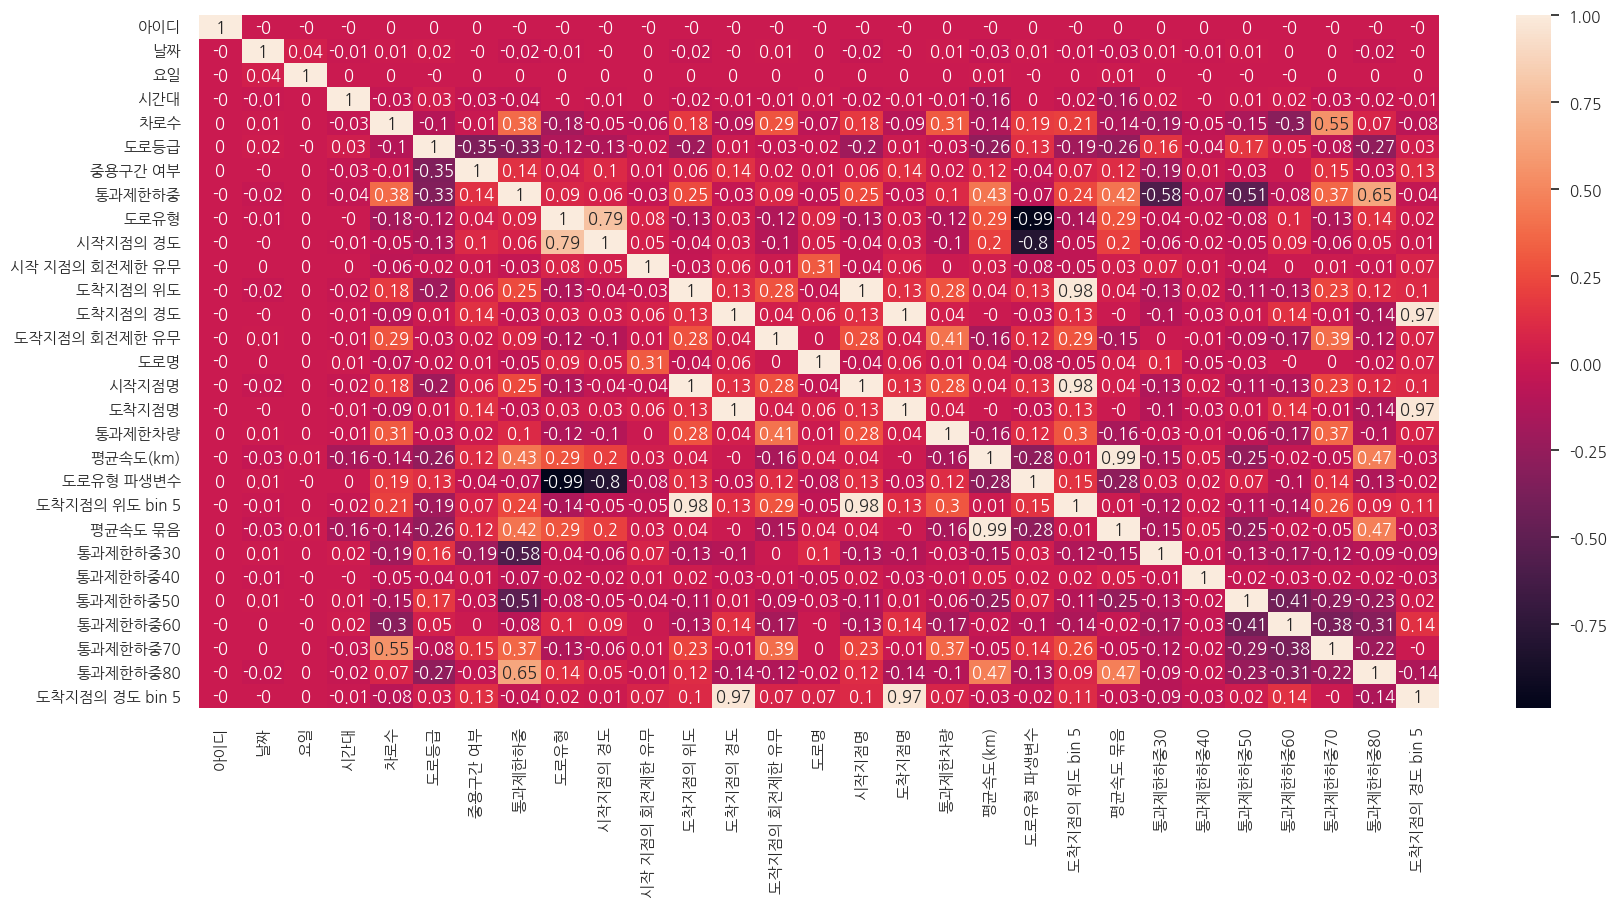

In [87]:
plt.figure(figsize=(20,9))

sns.heatmap(train_df.corr().round(2), annot=True);

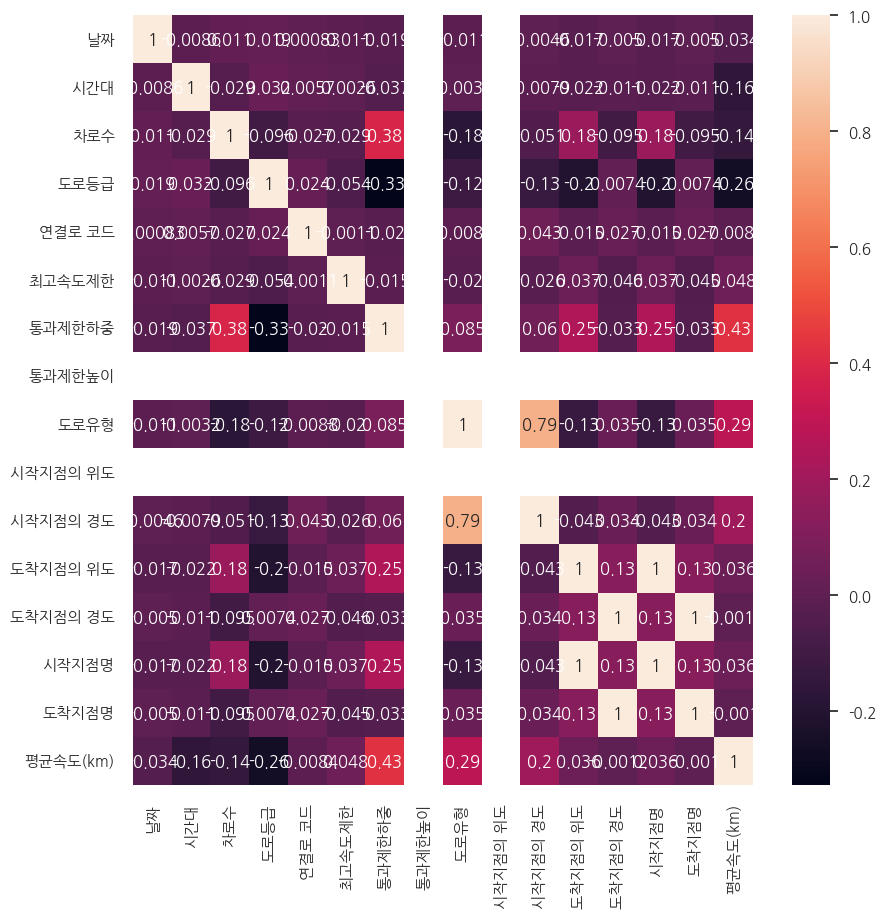

'날짜','시간대','통과제한하중60','도로유형 파생변수','도로등급','통과제한하중30','통과제한하중40'를 제외한다.

In [88]:
list_B = ['날짜','시간대','통과제한하중60','도로유형 파생변수','도로등급','통과제한하중30','통과제한하중40']


In [89]:
for i in list_B:
  train_df.drop(columns = [i], inplace = True)
  test_df.drop(columns = [i], inplace = True)

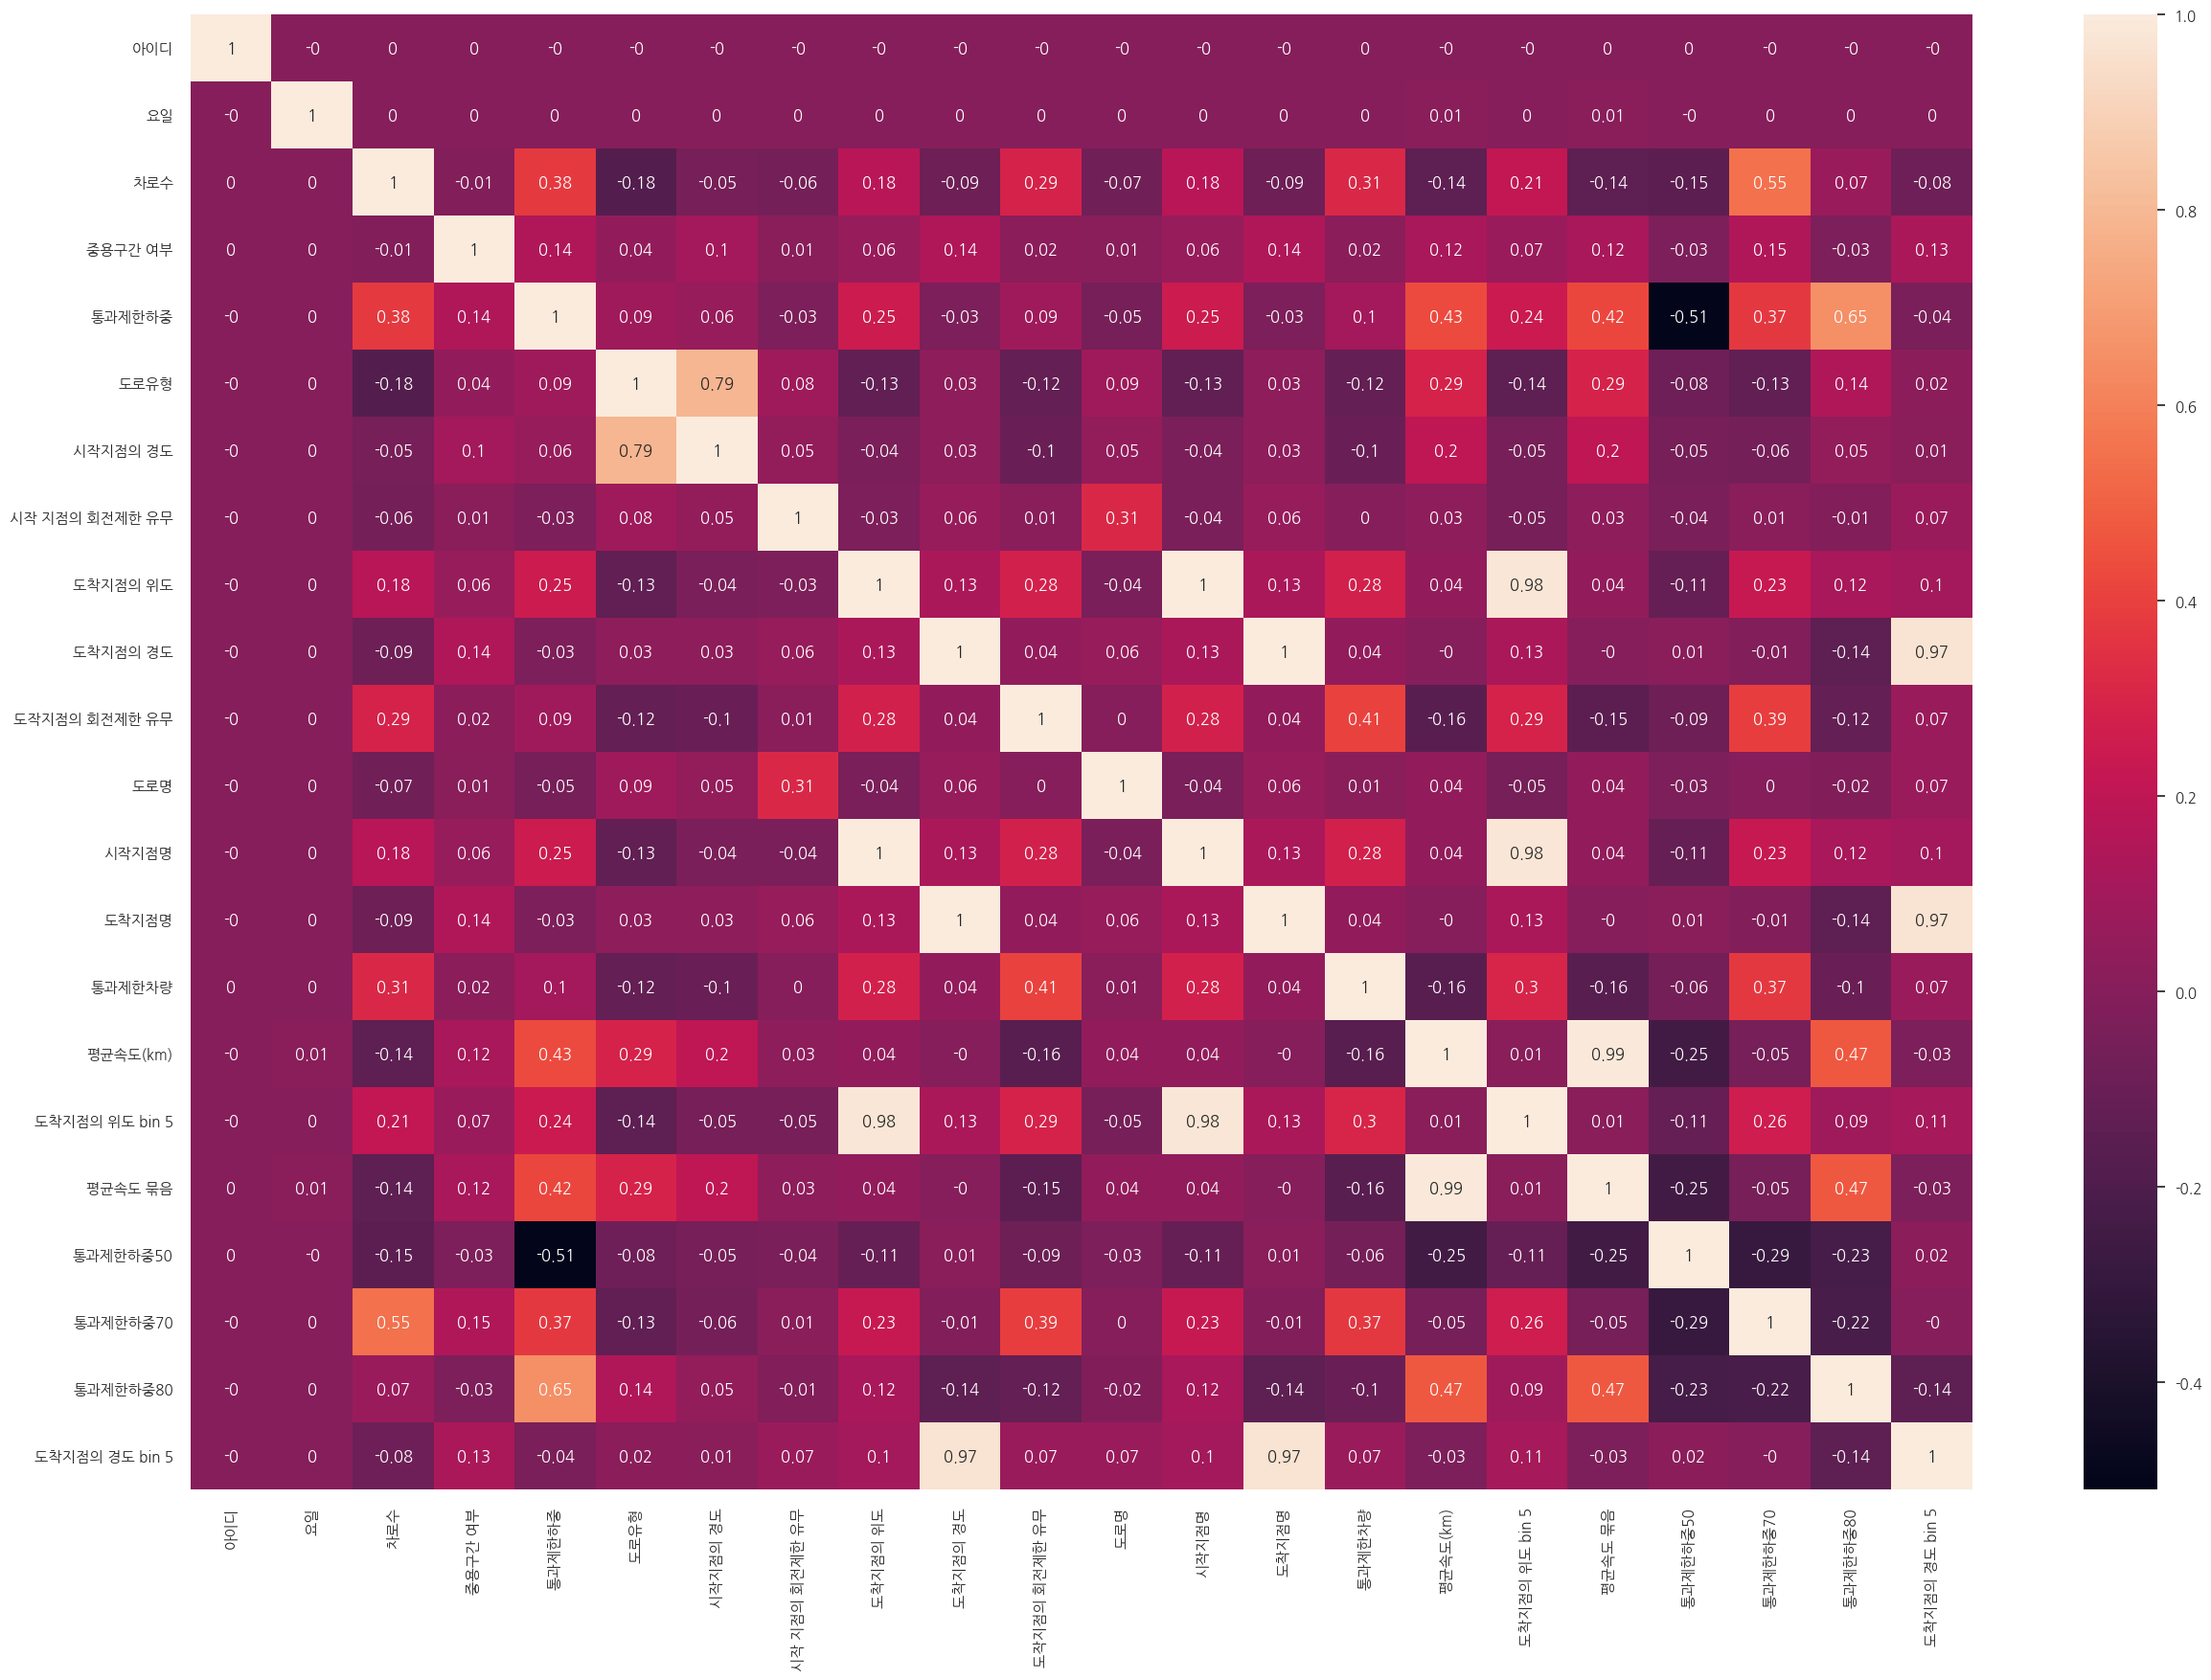

In [90]:
plt.figure(figsize=(30,20))

sns.heatmap(train_df.corr().round(2), annot=True);

아이디,요일, 중용구간 여부, 도착지점의 경도, 도착지점의 경도 bin 5, 도착지점명, 평균속도 묶음, 통과제한하중50 삭제

그리고 도착지점의 위도 bin 5가 원래 변수보다 상관관계가 높기때문에, 도착지점의 위도 삭제



In [91]:
list_B = ['아이디','요일','중용구간 여부','도착지점의 경도','도착지점의 경도 bin 5','도착지점명','평균속도 묶음','통과제한하중50','도착지점의 위도']

In [92]:
for i in list_B:
  train_df.drop(columns = [i], inplace = True)

In [93]:
list_B = ['아이디','요일','중용구간 여부','도착지점의 경도','도착지점의 경도 bin 5','도착지점명','통과제한하중50','도착지점의 위도']

In [94]:
for i in list_B:
  test_df.drop(columns = [i], inplace = True)

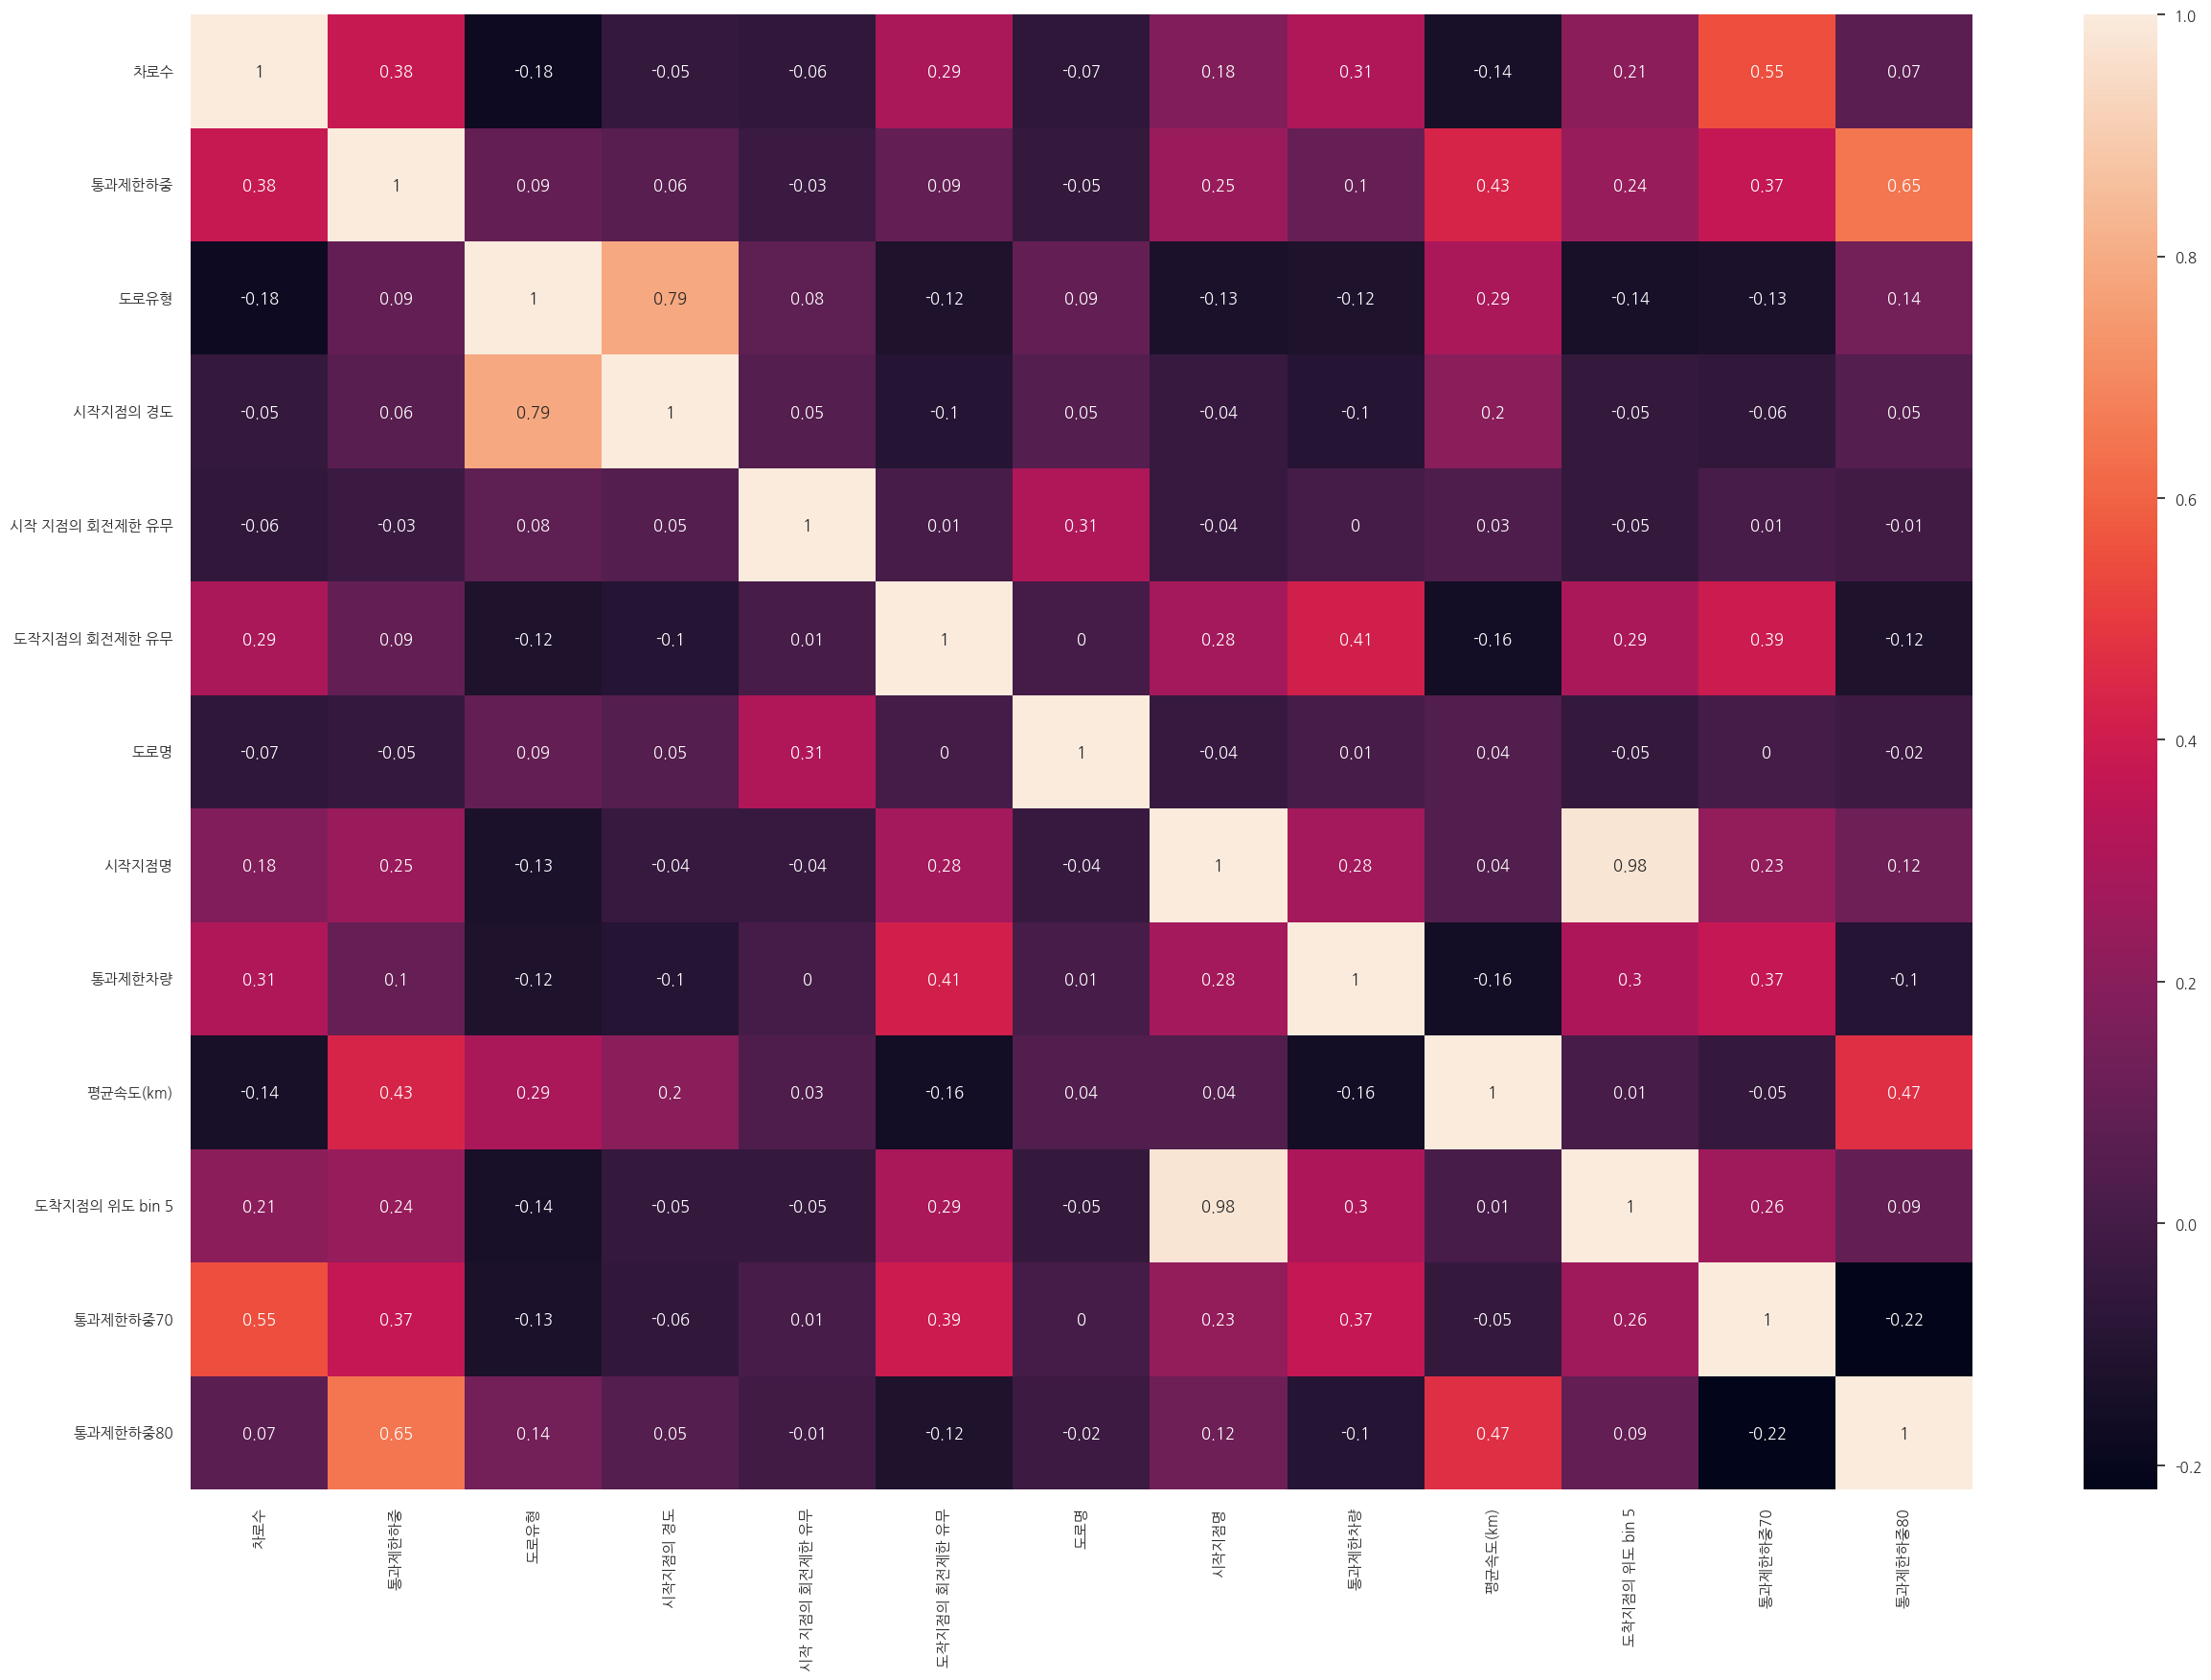

In [95]:
plt.figure(figsize=(30,20))

sns.heatmap(train_df.corr().round(2), annot=True);

통과제한하중보다 통과제한 하중 70,80이 더 상관관계가 뚜렷하기 때문에 통과제한 하중 변수를 삭제한다.

In [96]:
train_df

,차로수,통과제한하중,도로유형,시작지점의 경도,시작 지점의 회전제한 유무,도작지점의 회전제한 유무,도로명,시작지점명,통과제한차량,평균속도(km),도착지점의 위도 bin 5,통과제한하중70,통과제한하중80
0,1,60.0,32400.0,3,386,0,386,33.427749,0,52.0,2,False,False
1,2,60.0,0.0,0,32,1,2,33.504811,0,30.0,4,False,False
2,2,80.0,0.0,0,426,0,179,33.280072,0,61.0,0,False,True
3,2,50.0,0.0,0,58,0,203,33.245565,0,20.0,0,False,False
4,2,80.0,0.0,0,267,0,269,33.462677,0,38.0,3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,50.0,0.0,0,79,0,42,33.420955,0,20.0,2,False,False
4701213,2,80.0,43200.0,3,31,0,31,33.472525,0,65.0,3,False,True
4701214,2,60.0,0.0,0,19,0,214,33.444121,0,30.0,3,False,False
4701215,2,80.0,0.0,0,392,0,23,33.444996,0,73.0,3,False,True


In [97]:
train_df.drop(columns = ['통과제한하중'], inplace = True)
test_df.drop(columns = ['통과제한하중'], inplace = True)

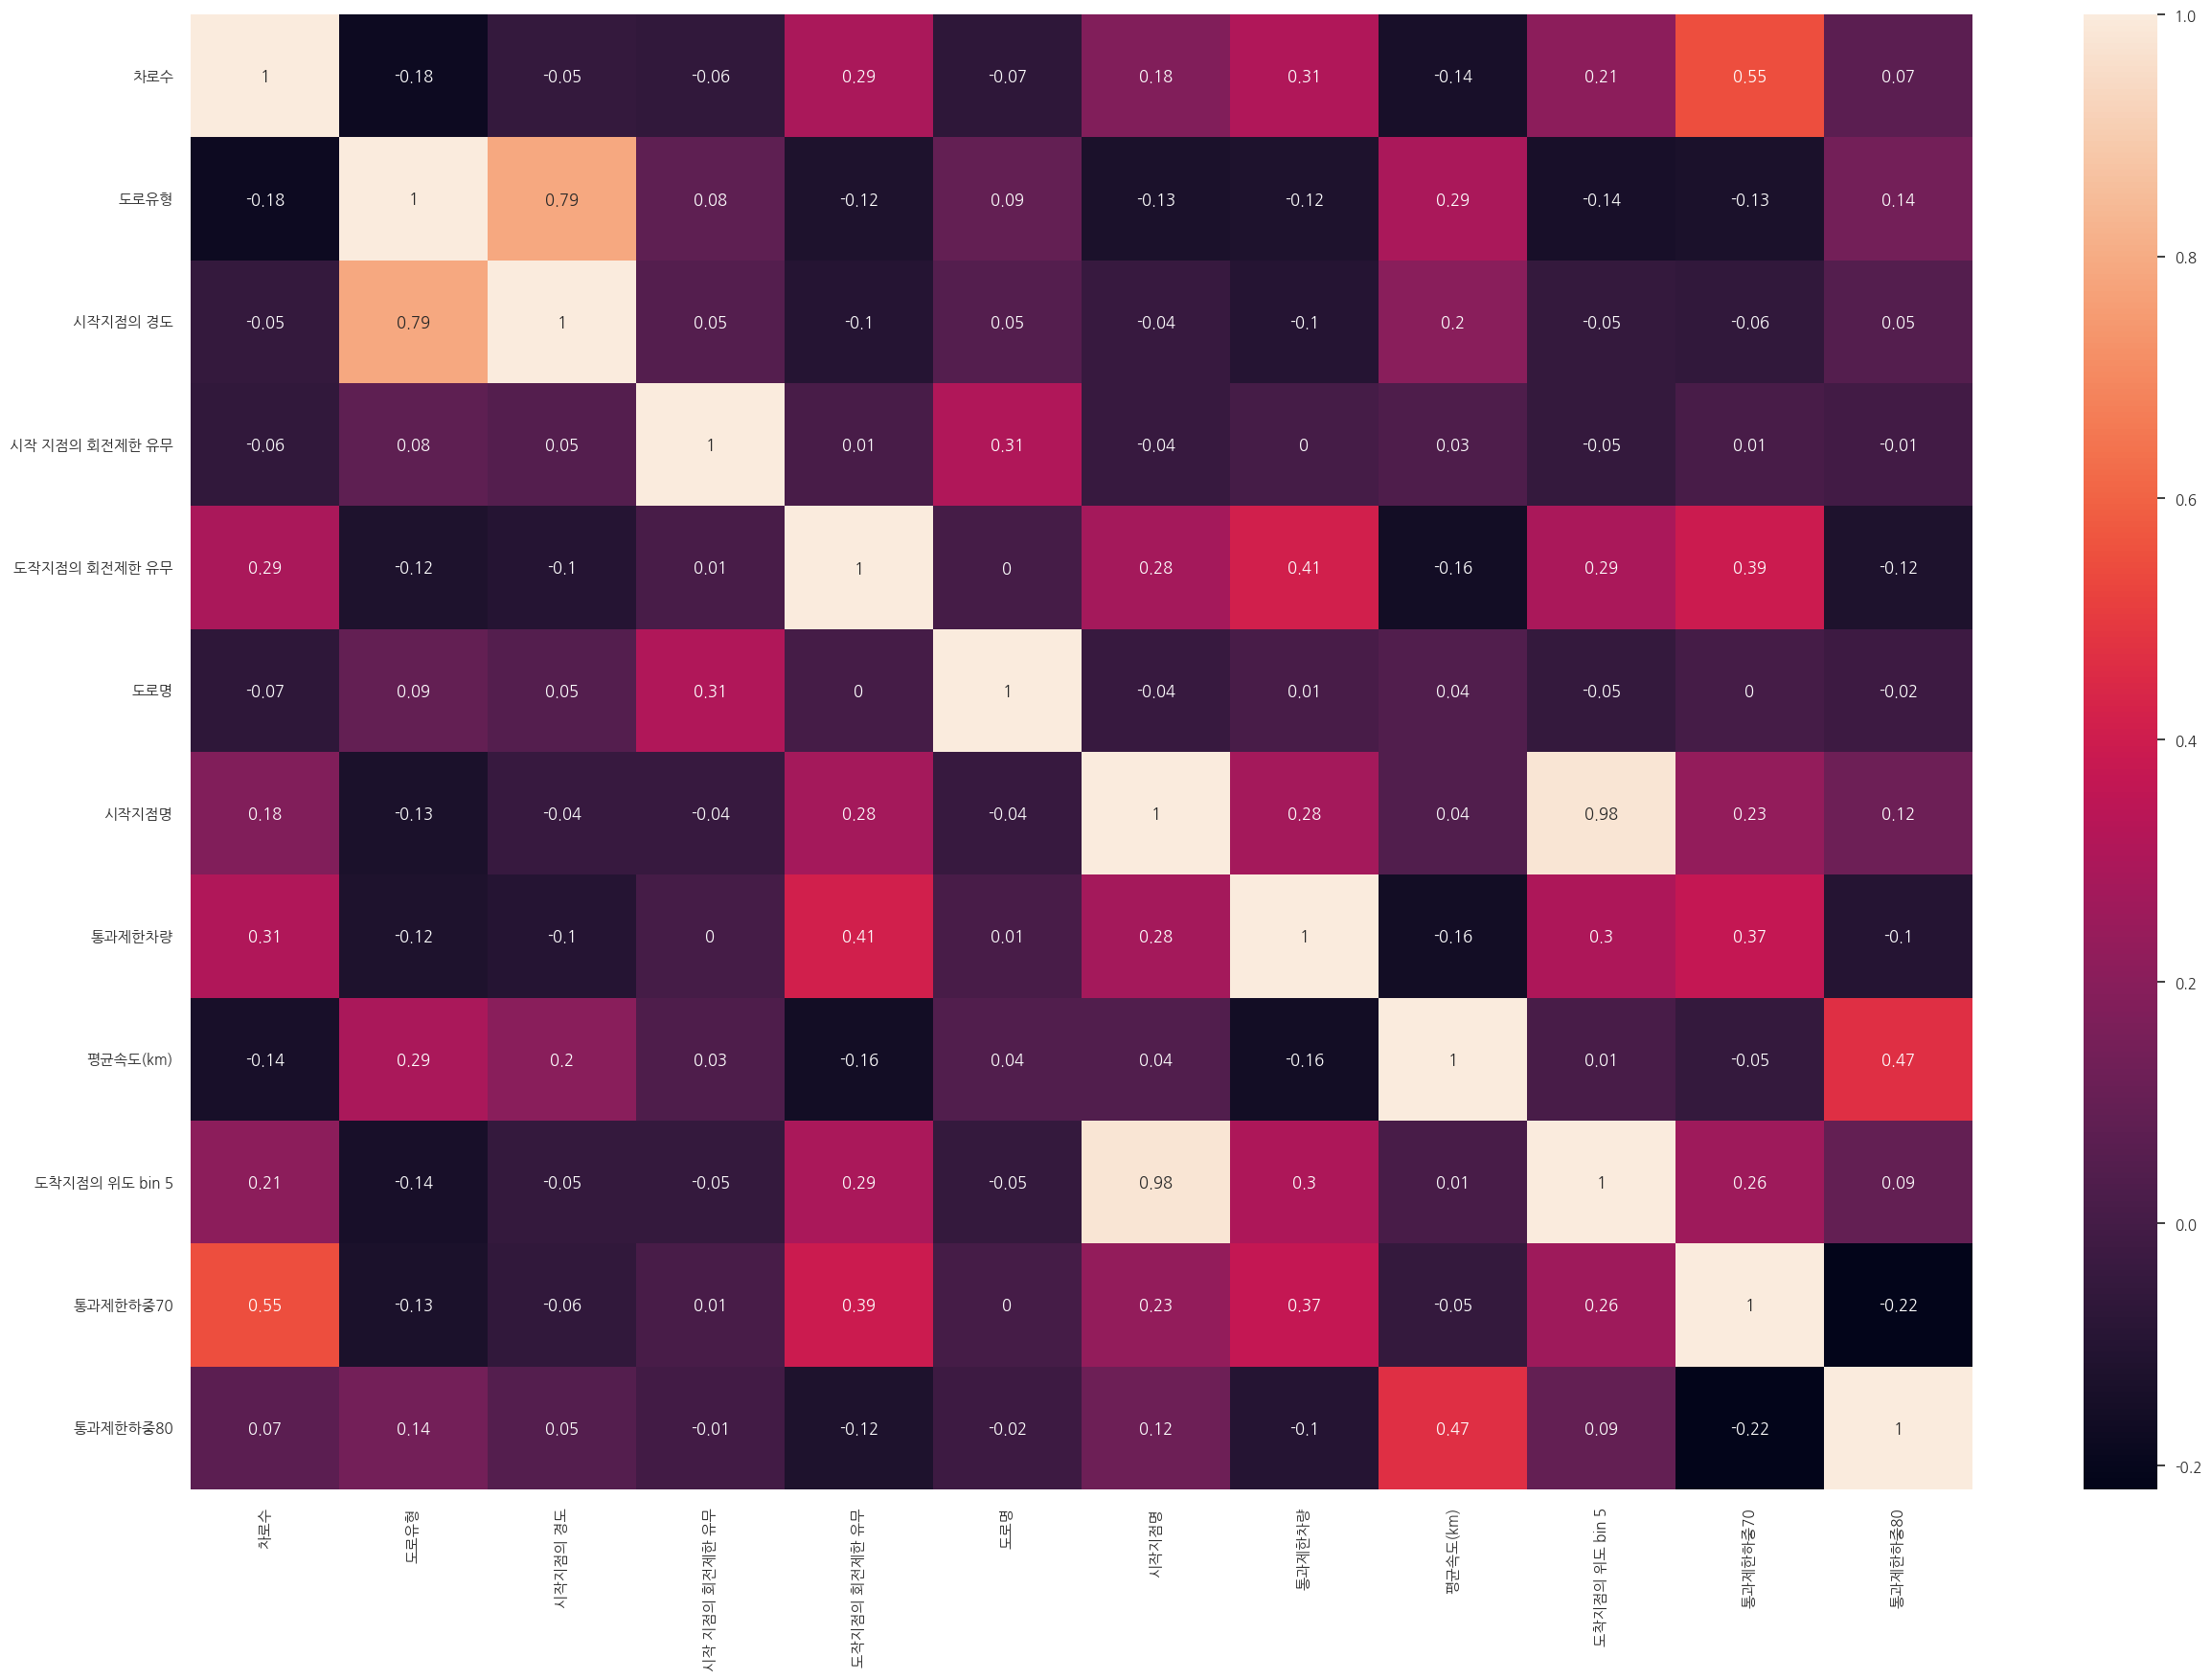

In [98]:
plt.figure(figsize=(30,20))

sns.heatmap(train_df.corr().round(2), annot=True);

# 이제 automl로 모델링을 해보자.

In [99]:
train_cp_df = train_df.copy()

In [100]:
test_cp_df = test_df.copy()

In [101]:
X,y = train_cp_df.drop("평균속도(km)", axis =1), train_cp_df['평균속도(km)']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [103]:
def plot_roc_curve( y_pred, y_prob):
    fper, tper, thresholds = roc_curve(y_test, y_prob[:,1])
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))

    print(f"Precision : {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1        : {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC       : {roc_auc_score(y_test, y_prob[:,1]):.4f}  ")
    plt.figure(figsize=(4,4))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [104]:
from pycaret.regression import *

In [105]:
from pycaret import regression

In [106]:
regression_setup = regression.setup(data=train_cp_df, target='평균속도(km)',train_size = 0.8)

,Description,Value
0,session_id,5842
1,Target,평균속도(km)
2,Original Data,"(4701158, 12)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3760926, 17)"


In [107]:
#top5_model = compare_models(sort = 'MAE', n_select = 5,fold=3)

In [108]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   차로수             291241 non-null  int64  
 1   도로유형            291241 non-null  float64
 2   시작지점의 경도        291241 non-null  int64  
 3   시작 지점의 회전제한 유무  291241 non-null  int32  
 4   도작지점의 회전제한 유무   291241 non-null  int32  
 5   도로명             291241 non-null  int32  
 6   시작지점명           291241 non-null  float64
 7   통과제한차량          291241 non-null  int32  
 8   도착지점의 위도 bin 5  291241 non-null  int64  
 9   통과제한하중70        291238 non-null  object 
 10  통과제한하중80        291238 non-null  object 
dtypes: float64(2), int32(4), int64(3), object(2)
memory usage: 20.0+ MB


https://dacon.io/en/competitions/official/235743/codeshare/2994

In [109]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### Linear Regression	--10.4070

In [110]:
#lr = create_model('lr', fold = 5)

In [111]:
#tuned_lr = tune_model(lr,fold=5,optimize='MAE')

### lasso ----11.5191

In [112]:
#lasso = create_model('lasso', fold = 5)

In [113]:
#tuned_lasso = tune_model(lasso,fold=5,optimize='MAE')

### ridge -----10.3091	

In [114]:
#en = create_model('en', fold = 5)

### lar	----10.3084

In [115]:
#lar	 = create_model('lar', fold = 5)

In [116]:
#llar = create_model('llar', fold = 5)

In [117]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.0761,48.1899,6.9419,0.8104,0.2117,0.1591
1,5.0818,48.3227,6.9515,0.8109,0.2122,0.1597
2,5.0665,48.0357,6.9308,0.8110,0.2105,0.1583
3,5.0775,48.2840,6.9487,0.8100,0.2114,0.1591
4,5.0766,48.2880,6.9490,0.8105,0.2113,0.1588
5,5.0904,48.4616,6.9614,0.8097,0.2120,0.1596
6,5.0766,48.2945,6.9494,0.8101,0.2113,0.1587
7,5.0800,48.3494,6.9534,0.8105,0.2113,0.1589
8,5.0661,48.0897,6.9347,0.8106,0.2106,0.1583


In [118]:
light = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.7942,57.2925,7.5692,0.7745,0.2317,0.1856
1,5.8013,57.3340,7.5719,0.7756,0.2318,0.1861
2,5.7588,56.7703,7.5346,0.7767,0.2294,0.1835
3,5.7807,57.0262,7.5516,0.7756,0.2302,0.1846
4,5.7639,56.9128,7.5441,0.7767,0.2301,0.1841
5,5.8182,57.7415,7.5988,0.7733,0.2326,0.1868
6,5.7908,57.2077,7.5636,0.7750,0.2306,0.1847
7,5.7817,57.1773,7.5616,0.7759,0.2304,0.1845
8,5.7819,57.2165,7.5642,0.7747,0.2306,0.1846


In [120]:
submission = pd.read_csv('C:/Users/rnfrn/Downloads/open/sample_submission.csv')

In [121]:
pred = predict_model(dt,data=test_df)

In [122]:
submission['target'] = pred.loc[:,'Label']

In [125]:
import os

In [126]:
os.chdir('C:/Users/rnfrn/Downloads/open')

In [127]:
submission.to_csv('finalk.csv')

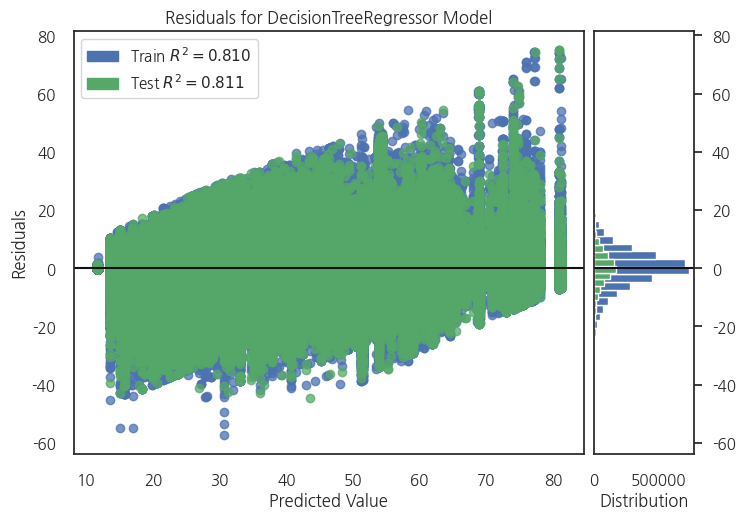

In [128]:
plot_model(dt)

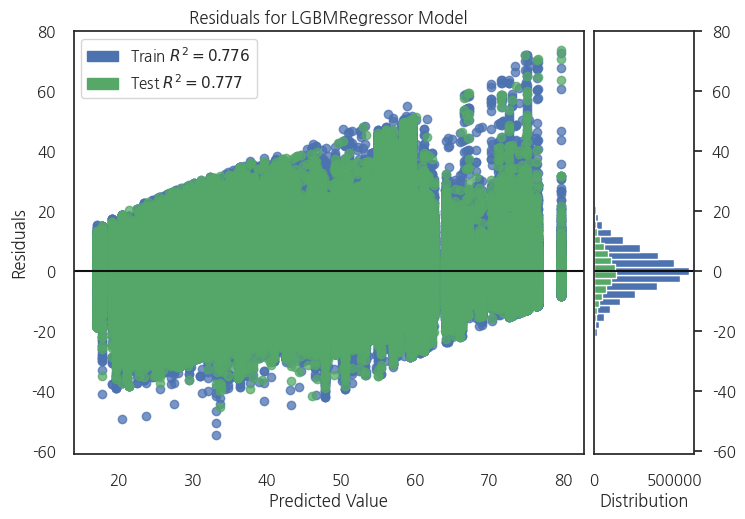

In [129]:
plot_model(light)